# Scraping beer review site 

In [1]:
# Import dependencies for data wrangling  
import pandas as pd 
import numpy as np
import requests 
import json
from pprint import pprint

In [2]:
# Import dependencies for scraping
import pymongo
from time import sleep
from bs4 import BeautifulSoup

from splinter import Browser 
from webdriver_manager.chrome import ChromeDriverManager

In [3]:
# Open the Chrome Driver Browser
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Current google-chrome version is 86.0.4240
[WDM] - Get LATEST driver version for 86.0.4240
[WDM] - Driver [C:\Users\pooja\.wdm\drivers\chromedriver\win32\86.0.4240.22\chromedriver.exe] found in cache


In [4]:
# Read in CSV
beer_df = pd.read_csv("../../Data/beer.gz", encoding="ISO-8859-1")
beer_df.head()

,Unnamed: 0,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
# Drop the "unnamed: 0" column 
beer_df = beer_df.drop(['Unnamed: 0'], axis = 1)
beer_df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
beer_names = beer_df["beer_beerid"].unique()
type(beer_names)

numpy.ndarray

In [7]:
# Page URL that we are going to scrape
url = "https://www.beeradvocate.com/beer/profile/" + str(beer_names[0]) + "/"
print(url)
browser.visit(url) 

# Convention to let the script we are running sleep to allow everything to load 
sleep(0.5)

https://www.beeradvocate.com/beer/profile/47986/


In [8]:
# Create a BeautifulSoup object and parse as lxml
html = browser.html
soup = BeautifulSoup(html, 'lxml')

In [ ]:
##import re

In [ ]:
#results = soup.find("div", class_ = "break")
#clean_results = results.text.split()
#clean_results[3:11]

In [ ]:
#results.text.split("\n")

In [ ]:
#clean_results[9]

In [ ]:
#r = re.compile("([0-9]+)([a-zA-Z]+)")
#m = r.match(text)
#m.group(1)

In [ ]:
#def listToString(s):
    
    #address_string = ""
    
    #for word in s:
        #address_string += " " + word
    #return address_string

#s = address
#print(listToString(s))  

In [9]:
# Interact with the map link
browser.click_link_by_partial_text('map')

C:\Users\pooja\anaconda3\Anaconda\envs\PythonData\lib\site-packages\splinter\driver\webdriver\__init__.py:528: FutureWarning: browser.find_link_by_partial_text is deprecated. Use browser.links.find_by_partial_text instead.
  FutureWarning,


In [ ]:
#browser.windows.current = browser.windows[1]
#html = browser.html 

In [12]:
browser.windows[1].is_current = True
html = browser.html 
soup = BeautifulSoup(html, 'lxml')

'<html itemscope="" itemtype="http://schema.org/Place" lang="en-AU" jstcache="0"><head> <link href="/maps/preview/opensearch.xml?hl=en" title="Google Maps" rel="search" type="application/opensearchdescription+xml"> <title>4814 Hardware Dr NE - Google Maps</title> <meta content=" Find local businesses, view maps and get driving directions in Google Maps. " name="Description">  <meta content="initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"> <meta content="chrome=1" http-equiv="X-UA-Compatible"> <meta content="notranslate" name="google"> <meta content="origin" name="referrer">   <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title"> <meta content="https://maps.google.com/maps/api/staticmap?center=35.13644508%2C-106.59166608&amp;zoom=17&amp;size=256x256&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=uXe1YLx69glEU51QQcn5HdPe02c" itemprop="image"> <meta content="https://maps.goog
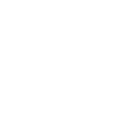
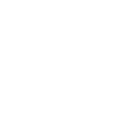

In [13]:
browser.html

In [33]:
#result = soup.find(id = 'gs_lc50')
#print(result.prettify())

In [41]:
result = soup.find("h1", class_ = "section-hero-header-title-title GLOBAL__gm2-headline-5")
result.text

' 4814 Hardware Dr NE  '

In [47]:
results = soup.find("div", class_ = "section-hero-header-title-top-container")
print(results.prettify())

for result in results: 
    street_address = 

<div class="section-hero-header-title-top-container">
 <div class="section-hero-header-title-description" jsan="7.section-hero-header-title-description" jstcache="169">
  <div jsinstance="*0" jstcache="170">
   <h1 class="section-hero-header-title-title GLOBAL__gm2-headline-5" jsan="7.section-hero-header-title-title,7.GLOBAL__gm2-headline-5" jstcache="171">
    <span jstcache="172">
     4814 Hardware Dr NE
    </span>
    <span class="section-hero-header-title-container" jstcache="173">
    </span>
   </h1>
  </div>
  <h2 class="section-hero-header-title-subtitle" jsinstance="0" jstcache="174">
   <span jstcache="175">
    Albuquerque, NM 87109
   </span>
  </h2>
  <h2 class="section-hero-header-title-subtitle" jsinstance="*1" jstcache="174">
   <span jstcache="175">
    USA
   </span>
  </h2>
  <div class="section-hero-header-title-description-container" jstcache="176">
   <div class="section-rating" jstcache="518">
    <div class="gm2-body-2 section-rating-line" jsan="7.gm2-body-2,7

AttributeError: 'NavigableString' object has no attribute 'find_all'